In [14]:
import numpy as np
import pandas as pd
import os
import joblib

In [89]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [90]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [92]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

unique_values = {col: data[col].unique() for col in categorical_cols}
unique_values

{'gender': array(['Female', 'Male'], dtype=object),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'TechSupport': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingTV': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingMovies': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 'PaymentMethod': array(['Electronic check', 'Mailed 

In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [94]:
# Correction de TotalCharges (conversion en float)
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan).astype(float)

In [95]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [97]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [98]:
# Remplacement des NaN par la médiane
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [ ]:
# Encodage des variables binaires
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
label_encoder = LabelEncoder()

for col in binary_cols:
	data[col] = label_encoder.fit_transform(data[col])

ValueError: y should be a 1d array, got an array of shape (7043, 11) instead.

In [81]:
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [82]:
# Encodage OneHot pour les variables à plusieurs catégories
multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines']
#data = pd.get_dummies(data, columns=multi_cat_cols, drop_first=True)
one_hot = OneHotEncoder()
data = pd.concat([data, pd.DataFrame(one_hot.fit_transform(data[multi_cat_cols].values).toarray(), columns=one_hot.get_feature_names_out(multi_cat_cols))], axis=1)

In [83]:
joblib.dump(one_hot, 'one_hot.joblib')

['one_hot.joblib']

In [84]:
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,0,0,1,0,-1.277445,0,No phone service,DSL,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,1,0,0,0,0.066327,1,No,DSL,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3668-QPYBK,1,0,0,0,-1.236724,1,No,DSL,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,7795-CFOCW,1,0,0,0,0.514251,0,No phone service,DSL,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9237-HQITU,0,0,0,0,-1.236724,1,No,Fiber optic,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [85]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

/home/stef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/stef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/stef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


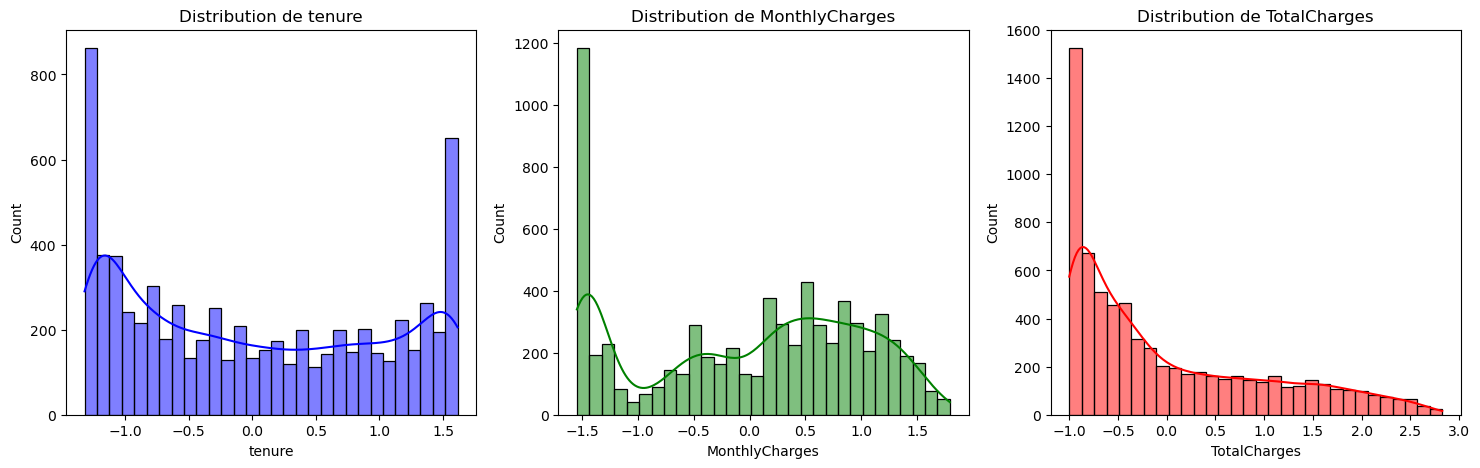

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des variables numériques
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data['tenure'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution de tenure')

sns.histplot(data['MonthlyCharges'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution de MonthlyCharges')

sns.histplot(data['TotalCharges'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribution de TotalCharges')

plt.show()


Au niveau de la variable tenure, observe une distribution multimodale avec deux pics majeurs, ce qui suggère que certains clients restent très peu de temps (nouveaux clients) et d'autres restent très longtemps.
On en déduit donc que les nouveaux clients peuvent être plus enclins à quitter.

Au niveau de la variable MonthlyCharges la distribution est asymétrique avec une concentration dans la partie basse. La majorité des clients paient des charges mensuelles relativement faibles.
Les charges mensuelles élevées pourraient être associées à un risque plus élevé de désabonnement.

Au niveau de la variable TotalCharges la distribution est également asymétrique et étirée vers la droite. Cela est attendu, car les charges totales augmentent avec l'ancienneté (tenure).
La variable peut contenir des informations importantes, car des clients ayant de faibles charges totales et une longue ancienneté pourraient être considérés comme stables.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   float64
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   object 
 8   InternetService                          7043 non-null   object 
 9   OnlineSecurity                           7043 non-null   int64  
 10  OnlineBackup                             7043 no

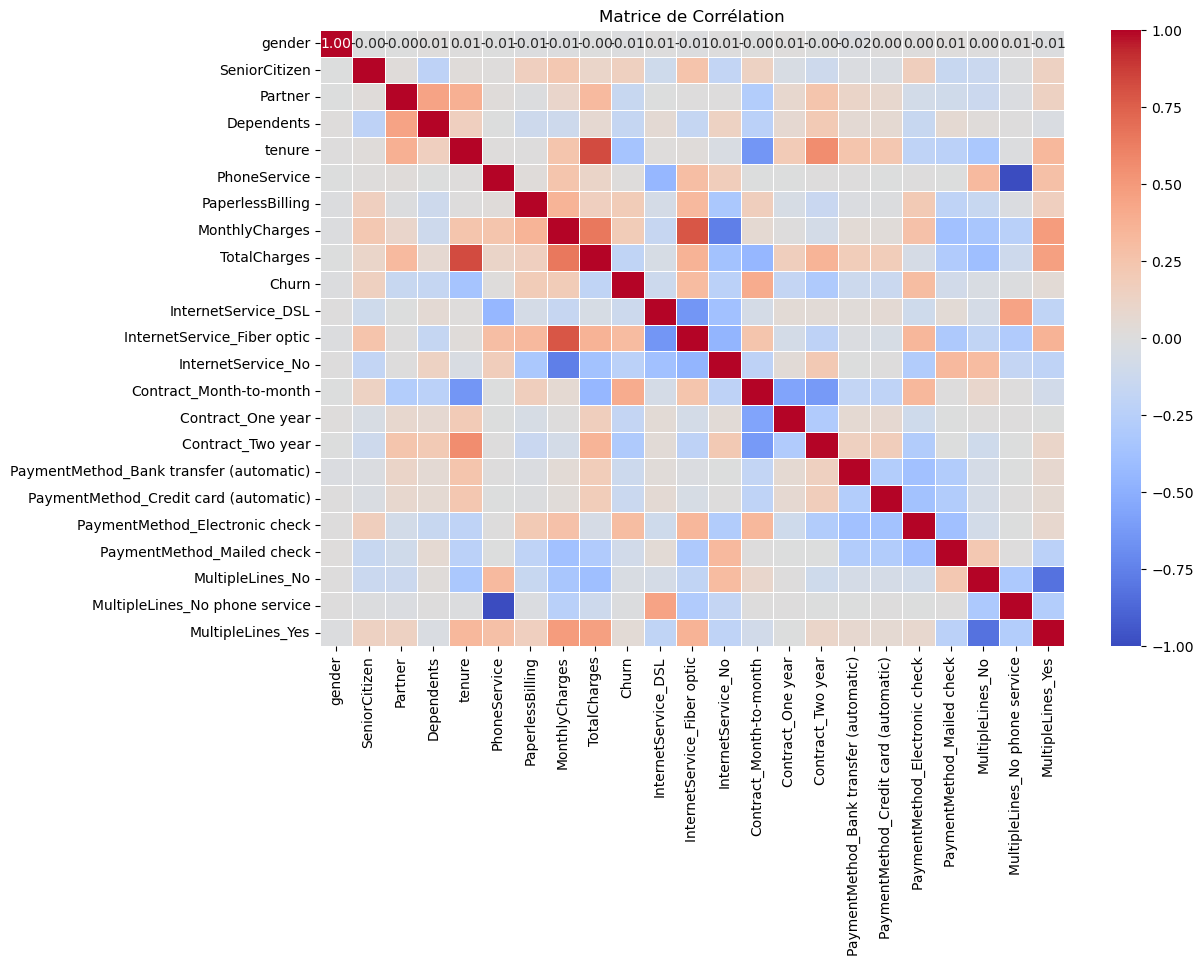

In [23]:
#data = data.copy()
#bool_columns = data.select_dtypes(include=['bool']).columns
#data[bool_columns] = data[bool_columns].astype(int)

# Exclusion des colonnes non numériques et de customerID
data_corr = data.drop(columns=['customerID', 'InternetService', 'Contract', 'MultipleLines', 'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                           'TechSupport', 'StreamingTV', 'StreamingMovies'])

# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


In [24]:
correlation = data_corr.corr()["Churn"].sort_values(ascending=False)
print(correlation)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
gender                                    -0.008612
MultipleLines_No phone service            -0.011942
MultipleLines_No                          -0.032569
PaymentMethod_Mailed check                -0.091683
PaymentMethod_Bank transfer (automatic)   -0.117937
InternetService_DSL                       -0.124214
PaymentMethod_Credit card (automatic)     -0.134302
Partner                                   -0.150448
Dependents                                -0.164221
Contract_One year                         -0.177820
TotalCharges

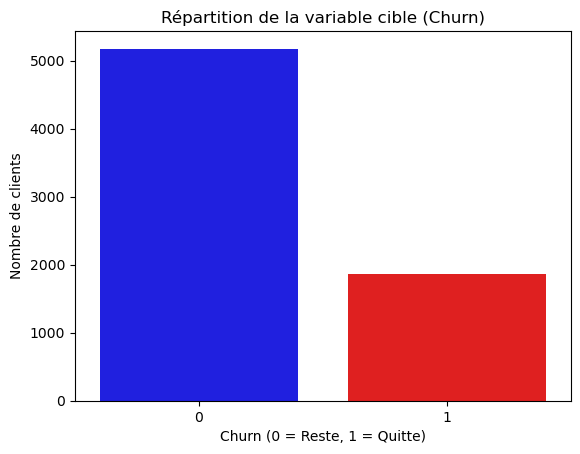

In [25]:
sns.countplot(x=data['Churn'], palette=['blue', 'red'])
plt.title("Répartition de la variable cible (Churn)")
plt.xlabel("Churn (0 = Reste, 1 = Quitte)")
plt.ylabel("Nombre de clients")
plt.show()

In [26]:
from sklearn.decomposition import PCA

# Standardiser les variables (important pour la PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_corr)

In [88]:
X_scaled.shape

(7043, 23)

In [27]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Transformer en DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_scaled.shape[1])])

# Afficher la variance expliquée
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :", explained_variance)
print("Variance cumulée :", np.cumsum(explained_variance))

Variance expliquée par chaque composante : [1.84932469e-01 1.65711079e-01 1.16162864e-01 5.98541100e-02
 5.56559289e-02 5.38774229e-02 5.15640051e-02 4.58039150e-02
 4.35472155e-02 4.20478610e-02 3.94529639e-02 3.67865124e-02
 3.35924941e-02 2.93955652e-02 2.09392514e-02 1.55298315e-02
 3.68026722e-03 1.46624355e-03 2.20981993e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Variance cumulée : [0.18493247 0.35064355 0.46680641 0.52666052 0.58231645 0.63619387
 0.68775788 0.73356179 0.77710901 0.81915687 0.85860983 0.89539635
 0.92898884 0.95838441 0.97932366 0.99485349 0.99853376 1.
 1.         1.         1.         1.         1.        ]


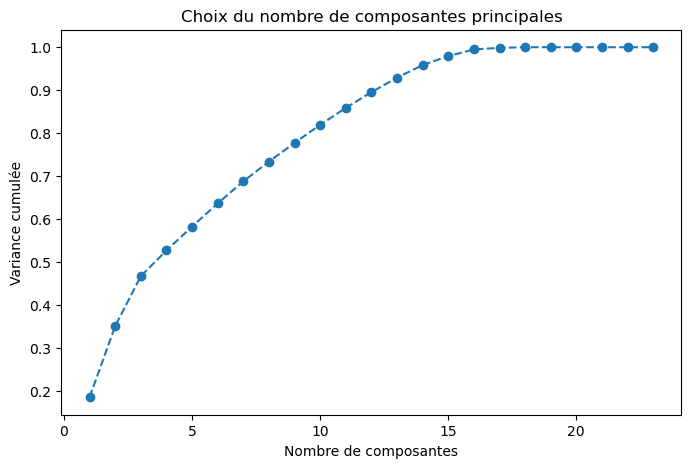

In [28]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée")
plt.title("Choix du nombre de composantes principales")
plt.show()

In [29]:
pca = PCA(n_components=5)
X_pca_reduced = pca.fit_transform(X_scaled)

# Transformer en DataFrame
df_pca_reduced = pd.DataFrame(X_pca_reduced, columns=[f"PC{i+1}" for i in range(5)])

# Afficher les premières lignes
print(df_pca_reduced.head())

        PC1       PC2       PC3       PC4       PC5
0 -1.917961  1.081967  4.696392 -0.611606 -0.203714
1 -2.006835 -0.770717 -0.216110  2.584118 -0.062429
2 -2.188287  2.148762  0.153577  0.278880  0.092490
3 -1.697167 -1.831865  4.299006  1.636873 -1.733896
4 -0.012003  3.470901 -0.513436  0.274689 -0.029644


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

y = data_corr['Churn'] 

X_train, X_test, y_train, y_test = train_test_split(df_pca_reduced, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Entraîner un modèle
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print("Précision :", accuracy_score(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Précision : 0.8140525195173882
Matrice de confusion :
 [[823 213]
 [ 49 324]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1036
           1       0.60      0.87      0.71       373

    accuracy                           0.81      1409
   macro avg       0.77      0.83      0.79      1409
weighted avg       0.85      0.81      0.82      1409



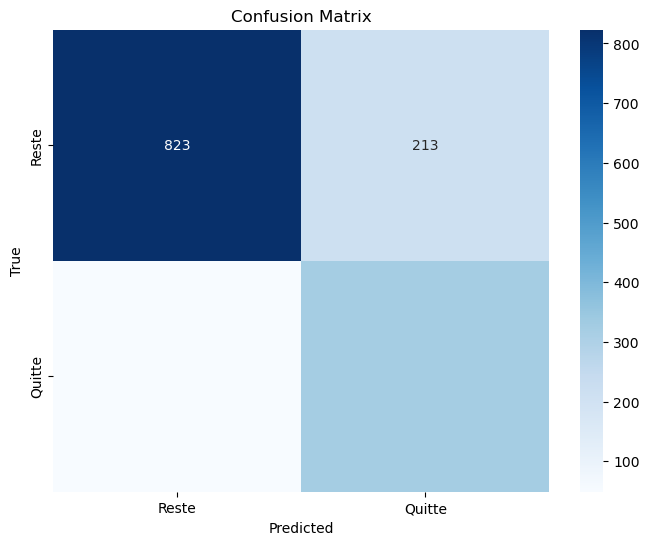

In [40]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Reste', 'Quitte']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, classification_report
#import shap

In [42]:
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [43]:
# Meilleur modèle et évaluation
print("Meilleur modèle Random Forest : ", rf_grid_search.best_params_)

Meilleur modèle Random Forest :  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [44]:
# Prédictions sur l'ensemble de test
rf_predictions = rf_grid_search.best_estimator_.predict(X_test)

In [45]:
# Calcul des métriques de performance
def evaluate_model(y_test, predictions):
    print("AUC-ROC : ", roc_auc_score(y_test, predictions))
    print("F1-score : ", f1_score(y_test, predictions))
    print("Précision : ", precision_score(y_test, predictions))
    print("Rappel : ", recall_score(y_test, predictions))
    print("Classification Report : \n", classification_report(y_test, predictions))

print("\nÉvaluation du modèle Random Forest :")
evaluate_model(y_test, rf_predictions)



Évaluation du modèle Random Forest :
AUC-ROC :  0.9410718167420579
F1-score :  0.9288702928870293
Précision :  0.9680232558139535
Rappel :  0.8927613941018767
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1036
           1       0.97      0.89      0.93       373

    accuracy                           0.96      1409
   macro avg       0.97      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409



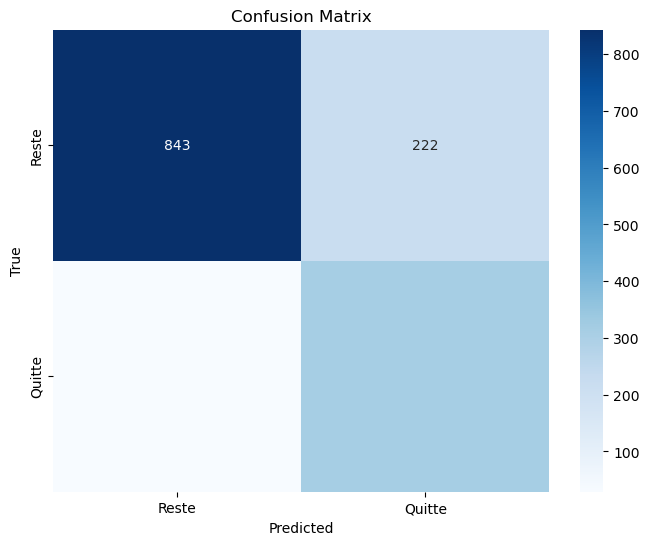

In [46]:
cm = confusion_matrix(rf_predictions, y_pred)
labels = ['Reste', 'Quitte']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [47]:
# Importance des caractéristiques avec Random Forest
rf_feature_importances = rf_grid_search.best_estimator_.feature_importances_
rf_features = df_pca_reduced.columns
rf_importance_df = pd.DataFrame({
    'Feature': rf_features,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nImportance des caractéristiques pour Random Forest :")
print(rf_importance_df)



Importance des caractéristiques pour Random Forest :
  Feature  Importance
1     PC2    0.454713
3     PC4    0.194387
4     PC5    0.135196
2     PC3    0.131140
0     PC1    0.084564


In [180]:
# Définir le pipeline et la recherche d'hyperparamètres pour XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='roc_auc')
xgb_grid_search.fit(X_train, y_train)

C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [14:50:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [14:50:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [14:50:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='roc_auc')

In [181]:
print("Meilleur modèle XGBoost : ", xgb_grid_search.best_params_)

Meilleur modèle XGBoost :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [182]:
xgb_predictions = xgb_grid_search.best_estimator_.predict(X_test)

In [183]:
print("\nÉvaluation du modèle XGBoost :")
evaluate_model(y_test, xgb_predictions)


Évaluation du modèle XGBoost :
AUC-ROC :  0.9534039976399226
F1-score :  0.9386084583901774
Précision :  0.9555555555555556
Rappel :  0.9222520107238605
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1036
           1       0.96      0.92      0.94       373

    accuracy                           0.97      1409
   macro avg       0.96      0.95      0.96      1409
weighted avg       0.97      0.97      0.97      1409



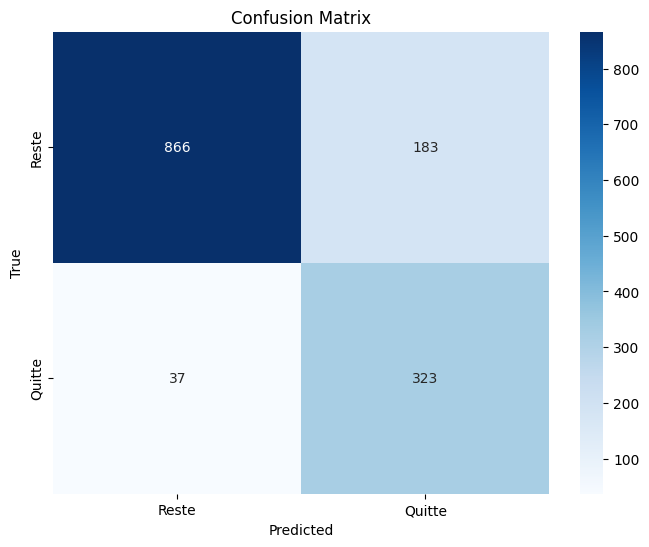

In [192]:
cm = confusion_matrix(xgb_predictions, y_pred)
labels = ['Reste', 'Quitte']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [185]:
# Importance des caractéristiques avec XGBoost
xgb_feature_importances = xgb_grid_search.best_estimator_.feature_importances_
xgb_importance_df = pd.DataFrame({
    'Feature': rf_features,
    'Importance': xgb_feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nImportance des caractéristiques pour XGBoost :")
print(xgb_importance_df)


Importance des caractéristiques pour XGBoost :
  Feature  Importance
1     PC2    0.522301
3     PC4    0.166831
4     PC5    0.120416
0     PC1    0.104522
2     PC3    0.085930


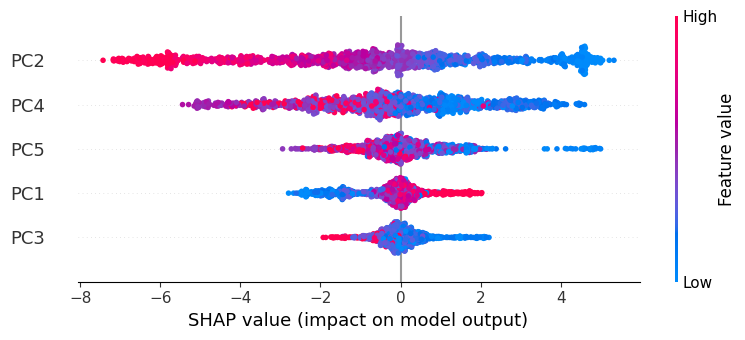

In [186]:
# Interprétabilité avec SHAP (pour XGBoost comme exemple)
explainer = shap.TreeExplainer(xgb_grid_search.best_estimator_)
shap_values = explainer.shap_values(X_test)

# Visualisation des valeurs SHAP
shap.summary_plot(shap_values, X_test)

In [187]:
import pickle

with open("modele_regression.pkl", "wb") as fichier:  # "wb" = write binary
    pickle.dump(model, fichier)

print("Modèle sauvegardé sous 'modele_regression.pkl' ✅")

Modèle sauvegardé sous 'modele_regression.pkl' ✅


In [48]:
joblib.dump(rf_grid_search, "rf_grid_search.joblib")

print("Modèle Random Forest sauvegardé ✅")

Modèle Random Forest sauvegardé ✅


In [ ]:
joblib.dump(xgb_grid_search, "xg_grid_search.joblib")

print("Modèle XG_BOOST sauvegardé ✅")

Modèle XG_BOOST sauvegardé ✅


In [49]:
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(pca, 'pca.joblib')

['pca.joblib']